In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.palettes import HighContrast
from matplotlib.ticker import FuncFormatter

In [2]:
my_palette = HighContrast[3]
my_colors = [my_palette[0], my_palette[2], my_palette[1]]

In [3]:
df = pd.read_csv('results_for_plotting.csv', sep=';')

In [6]:
def get_data(df, experiment):
    # experiment in R, noise, low, ood
    e_df = df[(df['dir'].str.contains(experiment)) | (df['dir'] =='images')]
    e_df['dir_n'] = e_df['dir'].apply(lambda x: 0 if x=='images' else int(x[8+len(experiment):]))
    e_df['dir_n'] = e_df['dir_n']/100
    e_df = e_df[['base', 'k', 'dir', 'dir_n', "AUC_"+experiment+"_negative"]]
    e_df = e_df.rename(columns={"AUC_"+experiment+"_negative": "test_AUC"})
    return e_df

In [7]:
def get_gender_data(df, experiment):
    # experiment in R, noise, low, ood
    e_df = df[(df['dir'].str.contains(experiment))]
    e_df['dir_n'] = e_df['dir'].apply(lambda x: 0 if x=='images' else int(x[1+len(experiment):]))
    e_df['dir_n'] = e_df['dir_n']/100
    e_df = e_df[['base', 'k', 'dir', 'dir_n', "AUC_gender"]]
    e_df = e_df.rename(columns={"AUC_gender": "test_AUC"})
    return e_df

def get_clean_data(df, experiment):
    # experiment in R, noise, low, ood
    e_df = df[(df['dir'].str.contains(experiment)) | (df['dir'] =='images')]
    e_df['dir_n'] = e_df['dir'].apply(lambda x: 0 if x=='images' else int(x[8+len(experiment):]))
    e_df['dir_n'] = e_df['dir_n']/100
    e_df = e_df[['base', 'k', 'dir', 'dir_n', "AUC"]]
    e_df = e_df.rename(columns={"AUC": "test_AUC"})
    return e_df

def get_clean_gender_data(df, experiment):
    # experiment in R, noise, low, ood
    e_df = df[(df['dir'].str.contains(experiment))]
    e_df['dir_n'] = e_df['dir'].apply(lambda x: 0 if x=='images' else int(x[1+len(experiment):]))
    e_df['dir_n'] = e_df['dir_n']/100
    e_df = e_df[['base', 'k', 'dir', 'dir_n', "AUC"]]
    e_df = e_df.rename(columns={"AUC": "test_AUC"})
    return e_df

In [8]:
R_df = get_data(df, 'R')
low_df = get_data(df, 'low')
gender_df = get_gender_data(df, 'F')
R_clean = get_clean_data(df, 'R')
low_clean = get_clean_data(df, 'low')
gender_clean = get_clean_gender_data(df, 'F')

/tmp/ipykernel_2230818/558036625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_df['dir_n'] = e_df['dir'].apply(lambda x: 0 if x=='images' else int(x[8+len(experiment):]))
/tmp/ipykernel_2230818/558036625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_df['dir_n'] = e_df['dir_n']/100
/tmp/ipykernel_2230818/558036625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [9]:
def my_formatter(x, pos):
    """Format 1 as 1, 0 as 0, and all values whose absolute values is between
    0 and 1 without the leading "0." (e.g., 0.7 is formatted as .7 and -0.4 is
    formatted as -.4)."""
    val_str = '{:g}'.format(x)
    if np.abs(x) > 0 and np.abs(x) < 1:
        return val_str.replace("0", "", 1)
    else:
        return val_str

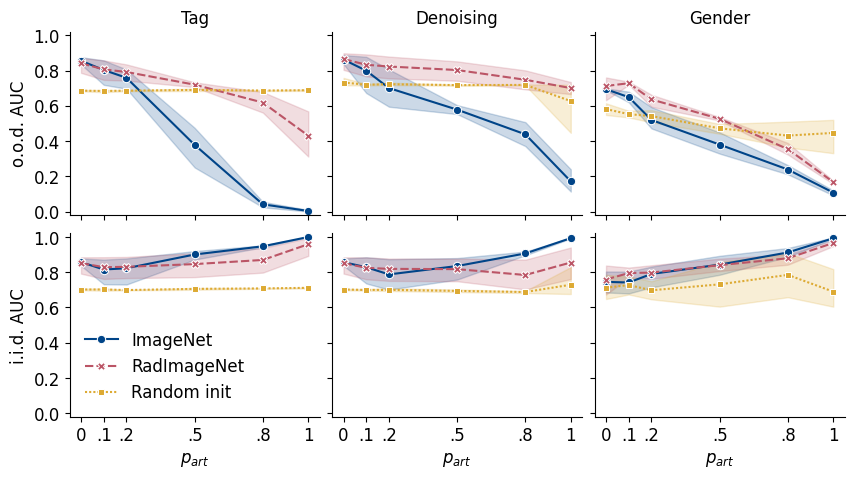

In [10]:
fs = 12
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
sns.lineplot(
    data=R_df.sort_values('base'),
    x="dir_n", y="test_AUC", hue="base", style="base",
    markers=True, dashes=True, palette=my_colors 
)
labels=[0, 0.1, 0.2, 0.5, 0.8, 1]
plt.xticks(labels)
plt.gca().axes.xaxis.set_ticklabels([])
plt.yticks(fontsize=fs) 
plt.xlabel('')
plt.ylabel('o.o.d. AUC', fontsize=fs)
plt.ylim(-0.02,1.02)
plt.title('Tag', fontsize=fs)
plt.legend('',frameon=False)
sns.despine()
#plt.savefig('test_'+experiment+'.pdf', bbox_inches='tight', transparent=True)

plt.subplot(2, 3, 2)
sns.lineplot(
    data=low_df.sort_values('base'),
    x="dir_n", y="test_AUC", hue="base", style="base",
    markers=True, dashes=True, palette=my_colors
)
labels=[0, 0.1, 0.2, 0.5, 0.8, 1]
plt.xticks(labels, fontsize=fs)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.yticks(fontsize=fs) 
plt.xlabel('')
plt.ylabel('')
plt.ylim(-0.02,1.02)
plt.title('Denoising', fontsize=fs)
plt.legend('',frameon=False)
sns.despine()

plt.subplot(2, 3, 3)
sns.lineplot(
    data=gender_df.sort_values('base'),
    x="dir_n", y="test_AUC", hue="base", style="base",
    markers=True, dashes=True, palette=my_colors
)
labels=[0, 0.1, 0.2, 0.5, 0.8, 1]
plt.xticks(labels, fontsize=fs)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.yticks(fontsize=fs)  
plt.xlabel('')
plt.ylabel('')
plt.ylim(-0.02,1.02)
plt.title('Gender', fontsize=fs)
plt.legend('', frameon=False)
sns.despine()

plt.subplot(2, 3, 4)
sns.lineplot(
    data=R_clean.sort_values('base'),
    x="dir_n", y="test_AUC", hue="base", style="base",
    markers=True, dashes=True, palette=my_colors
)
labels=[0, 0.1, 0.2, 0.5, 0.8, 1]
plt.xticks(labels, fontsize=fs) 
plt.yticks(fontsize=fs)
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter)) 
plt.xlabel(r'$p_{art}$', fontsize=fs)
plt.ylabel('i.i.d. AUC', fontsize=fs)
plt.ylim(-0.02,1.02)
plt.legend(loc='best', frameon=False, fontsize=fs).get_texts()[2].set_text('Random init')
sns.despine()

plt.subplot(2, 3, 5)
sns.lineplot(
    data=low_clean.sort_values('base'),
    x="dir_n", y="test_AUC", hue="base", style="base",
    markers=True, dashes=True, palette=my_colors
)
labels=[0, 0.1, 0.2, 0.5, 0.8, 1]
plt.xticks(labels, fontsize=fs) 
plt.yticks(fontsize=fs) 
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))
plt.xlabel(r'$p_{art}$', fontsize=fs)
plt.ylabel('')
plt.ylim(-0.02,1.02)
plt.legend('',frameon=False)
sns.despine()

plt.subplot(2, 3, 6)
sns.lineplot(
    data=gender_clean.sort_values('base'),
    x="dir_n", y="test_AUC", hue="base", style="base",
    markers=True, dashes=True, palette=my_colors
)
labels=[0, 0.1, 0.2, 0.5, 0.8, 1]
plt.xticks(labels, fontsize=fs) 
plt.yticks(fontsize=fs) 
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))
plt.xlabel(r'$p_{art}$', fontsize=fs)
plt.ylabel('')
plt.ylim(-0.02,1.02)
plt.legend('',frameon=False)
sns.despine()
plt.subplots_adjust(wspace=0.05, hspace=0.1)
#plt.show()
plt.savefig('results.pdf', bbox_inches='tight', transparent=True)

In [8]:
noise_df = get_data(df, 'noise')

/tmp/ipykernel_2136870/144972204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_df['dir_n'] = e_df['dir'].apply(lambda x: 0 if x=='images' else int(x[8+len(experiment):]))
/tmp/ipykernel_2136870/144972204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_df['dir_n'] = e_df['dir_n']/100


In [12]:
ct_df = pd.read_csv('results_ct.csv')

In [13]:
def get_ct_data(df, experiment):
    # experiment in imgs-n and imgs-s
    e_df = df[(df['dir'].str.contains(experiment))]
    e_df['dir_n'] = e_df['dir'].str.lstrip(experiment+'0').replace('', '0').astype(np.int64)
    e_df['dir_n'] = e_df['dir_n']/100
    e_df = e_df[['base', 'k', 'dir', 'dir_n', "AUC"]]
    return e_df

In [14]:
noise_df = get_data(df, 'noise')
ct_noise = get_ct_data(ct_df, 'imgs-n')
random_noise = get_ct_data(ct_df, 'imgs-x')

/tmp/ipykernel_2230818/558036625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_df['dir_n'] = e_df['dir'].apply(lambda x: 0 if x=='images' else int(x[8+len(experiment):]))
/tmp/ipykernel_2230818/558036625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_df['dir_n'] = e_df['dir_n']/100
/tmp/ipykernel_2230818/3984854274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

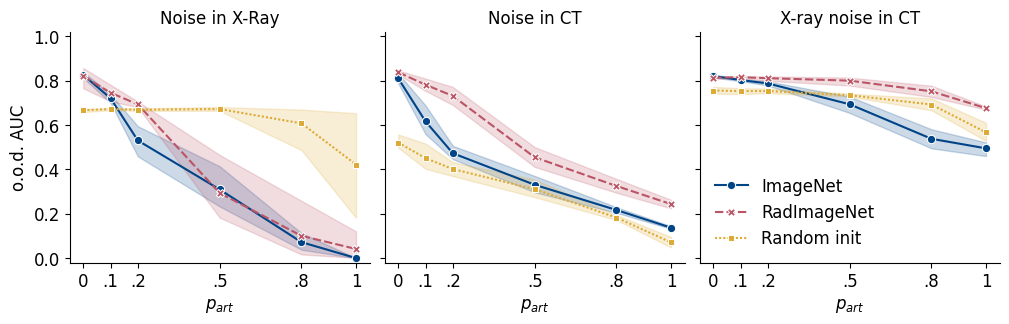

In [15]:
fs = 12
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.lineplot(
    data=noise_df.sort_values('base'),
    x="dir_n", y="test_AUC", hue="base", style="base",
    markers=True, dashes=True, palette=my_colors 
)
labels=[0, 0.1, 0.2, 0.5, 0.8, 1]
plt.xticks(labels, fontsize=fs)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))
plt.yticks(fontsize=fs) 
plt.xlabel(r'$p_{art}$', fontsize=fs)
plt.ylabel('o.o.d. AUC', fontsize=fs)
plt.ylim(-0.02,1.02)
plt.title('Noise in X-Ray', fontsize=fs)
plt.legend('',frameon=False)
sns.despine()

plt.subplot(1, 3, 2)
sns.lineplot(
    data=ct_noise.sort_values('base'),
    x="dir_n", y="AUC", hue="base", style="base",
    markers=True, dashes=True, palette=my_colors
)
labels=[0, 0.1, 0.2, 0.5, 0.8, 1]
plt.xticks(labels, fontsize=fs)
plt.yticks(fontsize=fs) 
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))
plt.ylabel('')
plt.xlabel(r'$p_{art}$', fontsize=fs)
plt.ylim(-0.02,1.02)
plt.title('Noise in CT', fontsize=fs)
plt.legend('',frameon=False)
sns.despine()

plt.subplot(1, 3, 3)
sns.lineplot(
    data=random_noise.sort_values('base'),
    x="dir_n", y="AUC", hue="base", style="base",
    markers=True, dashes=True, palette=my_colors
)
labels=[0, 0.1, 0.2, 0.5, 0.8, 1]
plt.xticks(labels, fontsize=fs) 
plt.yticks(fontsize=fs) 
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))
plt.xlabel(r'$p_{art}$', fontsize=fs)
plt.ylabel('')
plt.ylim(-0.02,1.02)
plt.legend('',frameon=False)
sns.despine()
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.title('X-ray noise in CT', fontsize=fs)
plt.legend(loc='best', frameon=False, fontsize=fs).get_texts()[2].set_text('Random init')
sns.despine()
plt.savefig('results_ct.pdf', bbox_inches='tight', transparent=True)